In [2]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

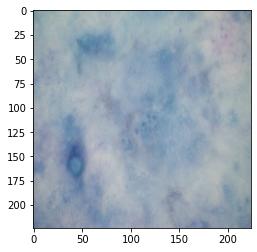

In [9]:
img = cv2.imread('../INCOMING/image.jpg')
plt.imshow(img)

In [10]:
import cv2
import numpy as np

def sharpen(img):
    kernel_sharpening = np.array([
                            [-1,-1,-1], 
                            [-1,9,-1], 
                            [-1,-1,-1]])
    new_img = cv2.filter2D(img, -1, kernel_sharpening)
    return new_img

In [17]:
def reshapeImage(image):

    image = tf.keras.preprocessing.image.smart_resize(
    image, (225, 225), interpolation='nearest'
    )
    image = np.reshape(image, (1, 225,225,3))
    return np.array(image)
    

In [19]:
reshapeImage(img) 

array([[[[116, 143, 153],
         [120, 147, 157],
         [124, 149, 159],
         ...,
         [122, 137, 153],
         [125, 135, 153],
         [125, 135, 153]],

        [[116, 143, 153],
         [119, 146, 156],
         [125, 150, 160],
         ...,
         [124, 139, 155],
         [126, 136, 154],
         [125, 135, 153]],

        [[116, 144, 155],
         [119, 147, 158],
         [123, 150, 160],
         ...,
         [125, 141, 154],
         [125, 135, 152],
         [122, 132, 149]],

        ...,

        [[ 92, 114, 142],
         [ 92, 114, 142],
         [ 98, 120, 148],
         ...,
         [105, 126, 148],
         [107, 128, 150],
         [109, 130, 152]],

        [[ 97, 119, 147],
         [ 97, 119, 147],
         [ 98, 122, 152],
         ...,
         [107, 127, 152],
         [105, 125, 150],
         [105, 125, 150]],

        [[ 95, 117, 145],
         [ 94, 116, 144],
         [ 96, 120, 150],
         ...,
         [108, 128, 153],
        

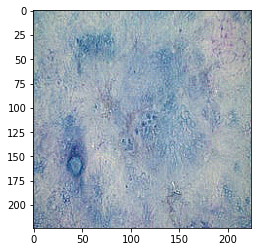

In [11]:
plt.imshow(sharpen(img))

In [15]:
def normalize(img):
    new_img = cv2.normalize(img, None, 
                            alpha=0, beta=200, 
                            norm_type=cv2.NORM_MINMAX)
    return new_img

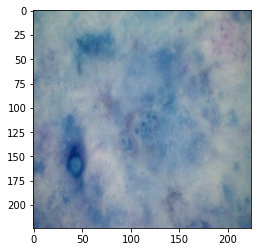

In [16]:
plt.imshow(normalize(img))

In [6]:
generator = trainGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 50,
    width_shift_range = 2.0,
    height_shift_range = 2.0,    
    shear_range = 0.4,
    zoom_range = 2.0,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

In [8]:
generator.zoom_range

[-1.0, 3.0]

In [12]:
transform = {
    'rescale' : 1./255,
    'rotation_range' : 50,
    'width_shift_range' : 2.0,
    'height_shift_range' : 2.0,
    'shear_range' : 0.4,
    'zoom_range' : 2.0,
    'horizontal_flip' : True,
    'vertical_flip' : True,
    'fill_mode' : 'nearest'
}

In [3]:
img = cv2.imread('../INCOMING/27.jpg')

In [4]:
img.shape

(224, 224, 3)

In [21]:
image = tf.keras.preprocessing.image.smart_resize(
    img, (225, 225), interpolation='nearest'
)

img.shape

(225, 225, 3)

In [24]:
import numpy as np
img = np.reshape(img, (1, 225,225,3))

In [26]:
# from statistics import mode


model = '../models/cnn/without-preprocessing1.h5'

model =tf.keras.models.load_model(model)

model.predict(img)

1/1 [==============================] - 0s 76ms/step


array([[1.]], dtype=float32)

In [36]:
melaImage = '../data/benign-malignant/train/malignant/10.jpg'
benImage = '../data/benign-malignant/train/benign/1000.jpg'

In [37]:
melaImage = cv2.imread(melaImage)
benImage = cv2.imread(benImage)

In [38]:
melaImage = tf.keras.preprocessing.image.smart_resize(
    melaImage, (225, 225), interpolation='nearest'
)
melaImage = np.reshape(melaImage, (1, 225,225,3))

In [39]:
benImage = tf.keras.preprocessing.image.smart_resize(
    benImage, (225, 225), interpolation='nearest'
)
benImage = np.reshape(benImage, (1, 225,225,3))

In [40]:
model.predict(melaImage)

1/1 [==============================] - 0s 114ms/step


array([[1.]], dtype=float32)

In [44]:
int(model.predict(benImage, verbose=0)[0])

0

In [2]:
model = tf.keras.models.load_model('../models/imagesTextCombined.h5')

In [4]:
img = cv2.imread('../INCOMING/27.jpg')


In [7]:
import pandas as pd
data = pd.read_csv('../data/train.csv')
data.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [41]:
train_dataset=data[['age_approx',  'sex', 'anatom_site_general_challenge','diagnosis', 'target']]
#Converting to onehot vector
sex_dummies = pd.get_dummies(train_dataset['sex'], prefix='sex')
train_dataset = pd.concat([train_dataset, sex_dummies], axis=1)
anatom_dummies = pd.get_dummies(train_dataset['anatom_site_general_challenge'], prefix='anatom')
train_dataset = pd.concat([train_dataset, anatom_dummies], axis=1)
diag_dummies = pd.get_dummies(train_dataset['diagnosis'], prefix='diagnosis')
train_dataset = pd.concat([train_dataset, diag_dummies], axis=1)
train_dataset_y= train_dataset['target']
train_dataset.drop(['target'], axis=1, inplace=True)
# train_dataset.drop(columns = ['sex', 'anatom_site_general_challenge', 'diagnosis'], inplace = True)

In [43]:
train_dataset.columns

Index(['age_approx', 'sex', 'anatom_site_general_challenge', 'diagnosis',
       'sex_female', 'sex_male', 'anatom_head/neck', 'anatom_lower extremity',
       'anatom_oral/genital', 'anatom_palms/soles', 'anatom_torso',
       'anatom_upper extremity',
       'diagnosis_atypical melanocytic proliferation',
       'diagnosis_cafe-au-lait macule', 'diagnosis_lentigo NOS',
       'diagnosis_lichenoid keratosis', 'diagnosis_melanoma',
       'diagnosis_nevus', 'diagnosis_seborrheic keratosis',
       'diagnosis_solar lentigo', 'diagnosis_unknown'],
      dtype='object')

In [49]:
trainTemp = train_dataset.drop(columns = [
    'diagnosis_atypical melanocytic proliferation',
    'diagnosis_cafe-au-lait macule',
    'diagnosis_solar lentigo',
    'sex',
    'anatom_site_general_challenge',
    'diagnosis'
])

In [31]:
np.array(img).shape

(1, 225, 225, 3)

In [51]:
np.array(train_dataset.iloc[0]).reshape(1, -1).shape

(1, 21)

In [40]:
train_dataset.iloc[0].shape

(18,)

In [56]:
import numpy as np
img = cv2.imread('../data/benign-malignant/train/malignant/10.jpg')
img = img.reshape(1, 224, 224, 3)
text = np.array(trainTemp.iloc[0]).reshape(1,-1)
model.predict(img, text)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()